# Public Safety
## By Oliver Schunn

Public Safety as measured by the regional data center contains a record of crimes from murder to drug violations in each neighborhood of Pittsburgh in 2010. For this project we will use the public safety census from 2010 to evaluate the quality of life of each neighborhood and then use that as the metric by which to measure which neighborhood is the "best". All this data shows the safeness of each neighborhood and what kind of issues each neighborhood is suffering from, thereby giving an accurate summation of the quality of life within all neighborhoods in Pittsburgh.

The reason we chose quality of life (QOL) as a representation of our metric was because we found that the safety of any specific neighborhood would be an accurate and direct indicator of the quality of a neighborhood, where less criminal activity correlates to higher quality of life and vice versa.

In [14]:
import pandas as pd
safetyData = pd.read_csv("PublicSafety.csv", index_col = "_id")
safetyData.head()

,Neighborhood,Sector #,Population (2010),#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010)
_id,,,,,,,,,,,,,,,
1,Allegheny Center,3,933,71,141,46,7.6,15.1,0,2,9,5,8,5,31
2,Allegheny West,3,462,38,49,31,8.2,10.6,1,0,4,6,6,4,12
3,Allentown,6,"2,500",159,252,160,6.4,10.1,0,2,15,23,48,11,66
4,Arlington,7,"1,869",50,84,48,2.7,4.5,0,1,8,5,15,7,9
5,Arlington Heights,7,244,19,37,24,7.8,15.2,0,0,4,5,5,3,7


This is just a sample of the data that represents major criminal activity within their respective neighborhoods. While all this data tells us a great deal about the issues of each neighborhood, it gives a lot of unnecessary information. So to visualize it all clearly adding a new category that takes the average of all the data makes it easier to comprehend and rank the information so as to find the best neighborhood. 

In [59]:
safetyData['Average Crime per 100 Persons (2010)'] = round((safetyData['Part 1 Crime per 100 Persons (2010)'] + safetyData['Part 2 Crime per 100 Persons (2010)'])/2, 2)
filtered = safetyData[['Neighborhood', 'Population (2010)', 'Part 1 Crime per 100 Persons (2010)', 'Part 2 Crime per 100 Persons (2010)', 'Average Crime per 100 Persons (2010)']]
filtered.head()

,Neighborhood,Population (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),Average Crime per 100 Persons (2010)
_id,,,,,
32,Fairywood,"1,002",0.3,0.6,0.45
55,New Homestead,990,0.7,0.4,0.55
76,Squirrel Hill North,"11,363",1.3,1.0,1.15
59,Oakwood,"1,027",1.4,1.4,1.40
46,Lincoln Place,"3,227",1.0,2.0,1.50


Now that the data is condensed and the new category is added, the safety and quality of life becomes more measurable. So now the 'best neighborhood' or 'worst neighborhood' is easily quantifiable.

In [60]:
filtered[filtered['Average Crime per 100 Persons (2010)']==filtered['Average Crime per 100 Persons (2010)'].min()]

,Neighborhood,Population (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),Average Crime per 100 Persons (2010)
_id,,,,,
32,Fairywood,"1,002",0.3,0.6,0.45


As you can see from the data Fairywood is the "best" neighborhood with a ratio of 0.45 crimes committed for every 100 persons in the neighborhood. From a statistical standpoint New Homestead is the safest place to live in all of Pittsburgh. Within our measurements for what makes the best neighborhood Fairywood would fall under that title. But what can that be compared to? Best as opposed to what? For that there needs visual representation of all the neighborhoods crime statistics to show the difference.

In [61]:
import matplotlib.pyplot as plt
safetyData.sort_values(by=['Average Crime per 100 Persons (2010)'], inplace=True)
filter2 = safetyData[['Neighborhood', 'Average Crime per 100 Persons (2010)']]
filter2.tail()

,Neighborhood,Average Crime per 100 Persons (2010)
_id,,
17,Central Business District,18.65
57,North Shore,23.10
80,Strip District,26.15
22,Chateau,181.85
71,South Shore,255.25


To find a visual representation the data needs to be further condensed so it can be graphed.

In [62]:
mask = filter2['Neighborhood'] == input('input a pittsburgh neighborhood: ')
filtering = safetyData[mask]
filtering.head()

input a pittsburgh neighborhood:  t


,Neighborhood,Sector #,Population (2010),#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010),Average Crime per 100 Persons (2010)
_id,,,,,,,,,,,,,,,,


i made this for fun :)

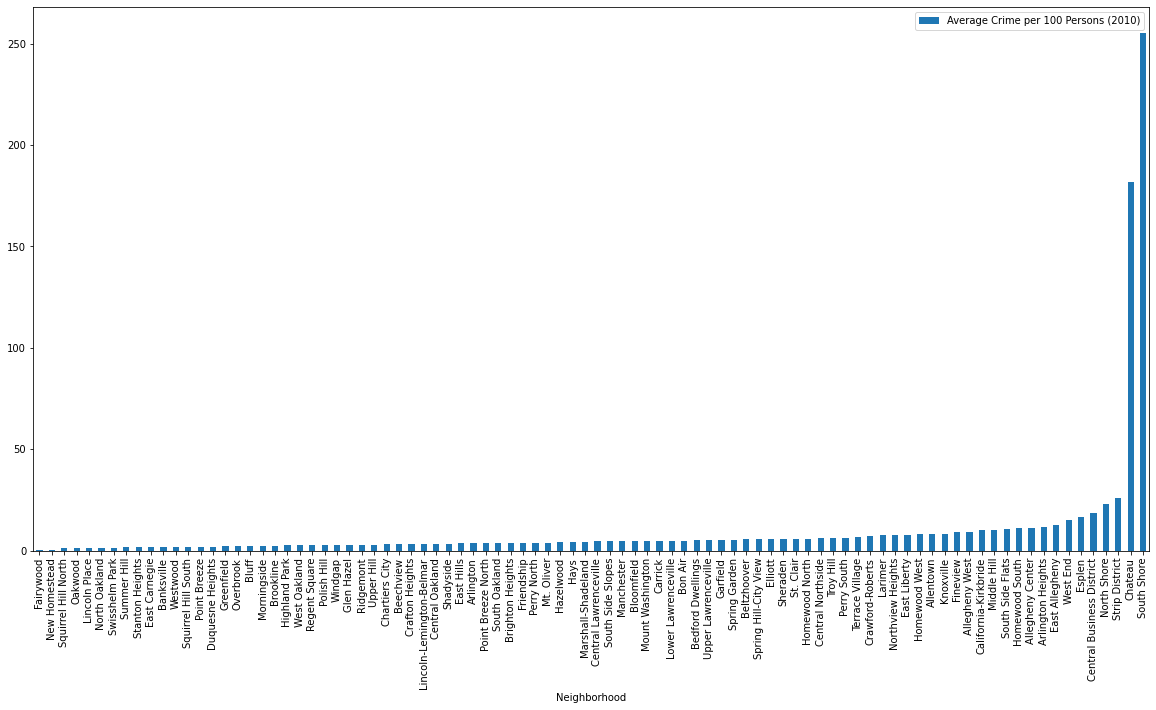

In [66]:
filter2.plot.bar(x="Neighborhood", y="Average Crime per 100 Persons (2010)", figsize=(20, 10))

Now the data is clearly shown in adjacent order from least amount of crime to most. Most neighborhoods have very similar crime statistics while both ends have either next to no crime to an exorbandant amount. There is nothing wrong with the data, South Shore and Chateu have the correct values inputted, however that is a large limitation to this metric.

There are some glaring issues with this style of evaluation for finding the 'best' nieghborhood as it does not take into account all the other factors that would inflate or deflate the statistics of each neighborhood. Not all crimes committed in a neighborhood are actors perpetuated by residents of that area. An example of this would be population, specifically in Chateau and South Shore's case. Both of these neighborhoods sport populations of lower than 20, making arrests within their borders count significantly higher than all the other neighborhoods. Chateau specifically also is located next to, formerly named Heinz Stadium now named Acrisure Stadium, which very likely inflated their numbers.

# Conclusion

While all this data gives an accurate summation of the criminal activity in 2010 criminal activity or lack thereof is not the only deciding factor in quality of living. Fairywood may statistically be the safest neighborhood in the city however that is only an indication of quiet and inactivity. There are innumerable amounts of factors that would contribute to lowering or raising a neighborhood's quality of living that could explain the crime ratio that their neighborhood has. Fairywood may be lacking in business and infrastructure making it a dead neighborhood lowering its quality of living as opposed to maybe Highland Park with a slightly higher criminality ratio but more businesses and infrastructure making it have a higher quality of living.